# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy



In [2]:
# Output File (CSV)

city_weather_data_file = "data/cities_weather_data.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding selected lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#assign url variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"       

#create list for dataframe

response = []
name=[]
latitude =[]
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
               
#set up counter for log

city_id = 0
series = 1

#Loop for responses

for city in cities:
    
    #create query url

    query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    print(query_url)
     
    #Count city and set series limits
    
    if city_id <= 49:
        city_id += 1 
        
        #print log
        
        print(f"Processing record for City {city_id} of Series {series} : Name = {city}")
        
        #request data from Open Weather 
        
        try:
            city_data_response = requests.get(query_url).json()
            
            response.append(city_data_response)          
            latitude.append(city_data_response['coord']['lat'])
            longitude.append(city_data_response['coord']['lon'])
            temperature.append(city_data_response['main']['temp_max'])
            humidity.append(city_data_response['main']['humidity'])
            cloudiness.append(city_data_response['clouds']['all'])
            wind_speed.append(city_data_response['wind']['speed'])
            country.append(city_data_response['sys']['country'])
            name.append(city_data_response['name'])
            date.append(city_data_response['dt'])
        
        except:
    
            print("City not found. Next...")
        
   #Reset series and city_id after 50 cities 

    else:
        series += 1
        city_id = 0
    

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=mount gambier&units=imperial
Processing record for City 1 of Series 1 : Name = mount gambier
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=komarno&units=imperial
Processing record for City 2 of Series 1 : Name = komarno
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=abashiri&units=imperial
Processing record for City 3 of Series 1 : Name = abashiri
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tsihombe&units=imperial
Processing record for City 4 of Series 1 : Name = tsihombe
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=husavik&units=imperial
Processing record for City 5 of Series 1 : Name = husavik
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=novyy urgal&units=imp

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=azangaro&units=imperial
Processing record for City 49 of Series 1 : Name = azangaro
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=puerto escondido&units=imperial
Processing record for City 50 of Series 1 : Name = puerto escondido
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tecoanapa&units=imperial
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=jining&units=imperial
Processing record for City 1 of Series 2 : Name = jining
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=gizo&units=imperial
Processing record for City 2 of Series 2 : Name = gizo
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=maningrida&units=imperial
Processing record for City 3 of Series 2 : Name = maningrida
http://api.openw

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kavieng&units=imperial
Processing record for City 46 of Series 2 : Name = kavieng
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=flinders&units=imperial
Processing record for City 47 of Series 2 : Name = flinders
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=seminole&units=imperial
Processing record for City 48 of Series 2 : Name = seminole
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=andra&units=imperial
Processing record for City 49 of Series 2 : Name = andra
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=fort pierce&units=imperial
Processing record for City 50 of Series 2 : Name = fort pierce
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=reconquista&units=imperial
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tanout&units=imperial
Processing record for City 42 of Series 3 : Name = tanout
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=sangar&units=imperial
Processing record for City 43 of Series 3 : Name = sangar
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kungurtug&units=imperial
Processing record for City 44 of Series 3 : Name = kungurtug
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=mariel&units=imperial
Processing record for City 45 of Series 3 : Name = mariel
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=fare&units=imperial
Processing record for City 46 of Series 3 : Name = fare
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=cidreira&units=imperial
Processing record for City 47 of Series 

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tabarqah&units=imperial
Processing record for City 40 of Series 4 : Name = tabarqah
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=mar del plata&units=imperial
Processing record for City 41 of Series 4 : Name = mar del plata
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=santa rosa&units=imperial
Processing record for City 42 of Series 4 : Name = santa rosa
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=polahongon&units=imperial
Processing record for City 43 of Series 4 : Name = polahongon
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ammon&units=imperial
Processing record for City 44 of Series 4 : Name = ammon
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=buchanan&u

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=sambava&units=imperial
Processing record for City 37 of Series 5 : Name = sambava
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=aswan&units=imperial
Processing record for City 38 of Series 5 : Name = aswan
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=marcona&units=imperial
Processing record for City 39 of Series 5 : Name = marcona
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=touros&units=imperial
Processing record for City 40 of Series 5 : Name = touros
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ponta do sol&units=imperial
Processing record for City 41 of Series 5 : Name = ponta do sol
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=sydney&units=imperial
Proces

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kimbe&units=imperial
Processing record for City 33 of Series 6 : Name = kimbe
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=jamestown&units=imperial
Processing record for City 34 of Series 6 : Name = jamestown
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=davidson&units=imperial
Processing record for City 35 of Series 6 : Name = davidson
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tuatapere&units=imperial
Processing record for City 36 of Series 6 : Name = tuatapere
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=daigo&units=imperial
Processing record for City 37 of Series 6 : Name = daigo
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=satitoa&units=imperial
Processing record for City 38 o

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ankang&units=imperial
Processing record for City 30 of Series 7 : Name = ankang
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=khani&units=imperial
Processing record for City 31 of Series 7 : Name = khani
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=boueni&units=imperial
Processing record for City 32 of Series 7 : Name = boueni
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=samusu&units=imperial
Processing record for City 33 of Series 7 : Name = samusu
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=mineral wells&units=imperial
Processing record for City 34 of Series 7 : Name = mineral wells
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=buin&units=imperial
Processing

City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=nagato&units=imperial
Processing record for City 26 of Series 8 : Name = nagato
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=pemba&units=imperial
Processing record for City 27 of Series 8 : Name = pemba
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kapoeta&units=imperial
Processing record for City 28 of Series 8 : Name = kapoeta
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kalmunai&units=imperial
Processing record for City 29 of Series 8 : Name = kalmunai
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kahului&units=imperial
Processing record for City 30 of Series 8 : Name = kahului
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tortoli&units=imperial
Processing re

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=luangwa&units=imperial
Processing record for City 24 of Series 9 : Name = luangwa
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=fort nelson&units=imperial
Processing record for City 25 of Series 9 : Name = fort nelson
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=nagapattinam&units=imperial
Processing record for City 26 of Series 9 : Name = nagapattinam
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=sedelnikovo&units=imperial
Processing record for City 27 of Series 9 : Name = sedelnikovo
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tucuman&units=imperial
Processing record for City 28 of Series 9 : Name = tucuman
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=gat&un

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=chirongui&units=imperial
Processing record for City 21 of Series 10 : Name = chirongui
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=bombay&units=imperial
Processing record for City 22 of Series 10 : Name = bombay
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=yulara&units=imperial
Processing record for City 23 of Series 10 : Name = yulara
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=palmer&units=imperial
Processing record for City 24 of Series 10 : Name = palmer
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=nikko&units=imperial
Processing record for City 25 of Series 10 : Name = nikko
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=babu&units=imperial
Processing record for City 26 of Seri

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=plouzane&units=imperial
Processing record for City 19 of Series 11 : Name = plouzane
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ishinomaki&units=imperial
Processing record for City 20 of Series 11 : Name = ishinomaki
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=sehithwa&units=imperial
Processing record for City 21 of Series 11 : Name = sehithwa
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=port macquarie&units=imperial
Processing record for City 22 of Series 11 : Name = port macquarie
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=monroe&units=imperial
Processing record for City 23 of Series 11 : Name = monroe
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=boda&units=imperial
Processin

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=oistins&units=imperial
Processing record for City 15 of Series 12 : Name = oistins
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=nouadhibou&units=imperial
Processing record for City 16 of Series 12 : Name = nouadhibou
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=jambalo&units=imperial
Processing record for City 17 of Series 12 : Name = jambalo
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=aykhal&units=imperial
Processing record for City 18 of Series 12 : Name = aykhal
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=leshukonskoye&units=imperial
Processing record for City 19 of Series 12 : Name = leshukonskoye
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=krasnyy kholm&units=imperial
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
name

['Mount Gambier',
 'Komárno',
 'Abashiri',
 'Husavik',
 'Novyy Urgal',
 'Kapaa',
 'Albany',
 'Camacha',
 'George Town',
 'Karratha',
 'Torbay',
 'Rikitea',
 'Bilma',
 'Chui',
 'Peniche',
 'Mahébourg',
 'Hermanus',
 'Mackay',
 'Puerto Ayora',
 'Balud',
 'Barrow',
 'São João da Barra',
 'Hilo',
 'Narsaq',
 'Ushuaia',
 'San Cristobal',
 'Yellowknife',
 'Punta Arenas',
 'Bethel',
 'Sistranda',
 'Busselton',
 'Faanui',
 'New Norfolk',
 'Batticaloa',
 'Nikolskoye',
 'Tasiilaq',
 'Saint-Philippe',
 'Champerico',
 'Hobart',
 'Myitkyina',
 'Carutapera',
 'Abakaliki',
 'Dongsheng',
 'Azángaro',
 'Puerto Escondido',
 'Jining',
 'Gizo Government Station',
 'Maningrida',
 'Port Hedland',
 'Port Blair',
 'Atuona',
 'Qaanaaq',
 'Longyearbyen',
 'Saint Paul Harbor',
 'Rørvik',
 'Hong Kong',
 'San Patricio',
 'Stokmarknes',
 'Caravelas',
 'Pevek',
 'Cape Town',
 'Panguna',
 'Okha',
 'Fianarantsoa',
 'Chokurdakh',
 'Whitehorse',
 'Bambous Virieux',
 'Morehead',
 'Pisco',
 'Butaritari',
 'Saskylakh',
 'V

In [14]:
#Creates dataframe

weather_data = pd.DataFrame({"City" : name,
                            "Latitude": latitude,
                            "Longitude": longitude,
                            "Maximum Temperature (F)": temperature,
                            "Humidity (%)": humidity,
                            "Cloudiness (%)": cloudiness,
                            "Wind Speed (MPH)": wind_speed,
                            "Country": country,
                            "Date": date})




#weather_data.to_csv("data/city_weather_data.csv")

weather_data.count()



City                       559
Latitude                   559
Longitude                  559
Maximum Temperature (F)    559
Humidity (%)               559
Cloudiness (%)             559
Wind Speed (MPH)           559
Country                    559
Date                       559
dtype: int64

In [15]:
#Veiw data frame

weather_data.head()

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Mount Gambier,-37.8333,140.7667,55.40,94,90,2.82,AU,1611259784
1,Komárno,47.7636,18.1226,51.80,62,0,21.85,SK,1611259785
2,Abashiri,44.0213,144.2697,21.70,95,100,3.98,JP,1611259786
3,Husavik,66.0449,-17.3389,28.40,74,40,16.11,IS,1611259786
4,Novyy Urgal,51.0736,132.5642,-25.69,83,19,0.92,RU,1611259787


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#Check to see if any cities have humidity over 100%

weather_data.describe()

,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.076154,18.989172,52.651914,71.787120,51.787120,8.416351,1.611260e+09
std,33.077649,91.846554,32.006056,20.335081,40.328305,6.091015,6.106372e+01
min,-54.800000,-179.166700,-57.370000,10.000000,0.000000,0.560000,1.611260e+09
25%,-10.208350,-65.060750,34.060000,61.000000,5.000000,3.860000,1.611260e+09
50%,21.315600,18.936700,64.400000,78.000000,61.000000,6.910000,1.611260e+09
75%,43.477150,105.209700,77.000000,87.000000,92.000000,11.400000,1.611260e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,47.180000,1.611260e+09


In [24]:
#  Get the indices of cities that have humidity over 100%.


humidity_100_percent = weather_data.loc[weather_data["Humidity (%)"] >= 100]
     
humidity_100_percent    
    
    


,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
93,Vardø,70.3705,31.1107,21.20,100,75,20.92,NO,1611259801
110,Carnarvon,-24.8667,113.6333,75.20,100,75,14.97,AU,1611259808
127,Harlingen,26.1906,-97.6961,60.80,100,90,8.88,US,1611259634
143,Sitka,57.0531,-135.3300,37.40,100,90,3.83,US,1611259812
170,Kununurra,-15.7667,128.7333,80.60,100,40,3.44,AU,1611259819
176,Santa Rosa,14.3122,121.1114,80.01,100,90,4.00,PH,1611259707
213,Airai,-8.9266,125.4092,62.28,100,99,2.53,TL,1611259827
257,Yārāda,17.6500,83.2667,73.40,100,20,2.30,IN,1611259837
360,Artyom,40.4723,50.3330,30.20,100,0,2.30,AZ,1611259855
440,Ziro,27.6333,93.8333,34.59,100,26,2.21,IN,1611259867


In [25]:
#Remove cities with humidities > 100%

Cleaned_weather_data = weather_data.loc[weather_data["Humidity (%)"] < 100]
     
Cleaned_weather_data.count()

City                       549
Latitude                   549
Longitude                  549
Maximum Temperature (F)    549
Humidity (%)               549
Cloudiness (%)             549
Wind Speed (MPH)           549
Country                    549
Date                       549
dtype: int64

10 humidity results were over 100%

## Latitude vs. Temperature Plot

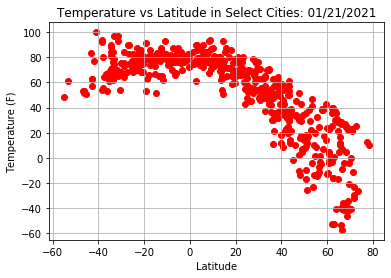

In [26]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Maximum Temperature (F)"], marker="o", color="red")

date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")

# Incorporate the other graph properties

plt.title("Temperature vs Latitude in Select Cities:"+ " " + date_of_analysis)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

 #Save the figure
    
plt.savefig("Images/Temperature vs Latitude in Select Cities: .png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their max temperature.
The plot is suggesting that there is a strong correlation between latitude and max temperature. The closer cities are to the equators the higher temperature and drops as they approach the poles.

## Latitude vs. Humidity Plot

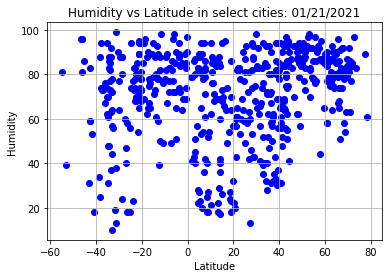

In [28]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Humidity (%)"], marker="o", color="blue")

# Incorporate the other graph properties

plt.title("Humidity vs Latitude in select cities:" + " " + date_of_analysis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Humidity vs Latitude in select cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their humidity.
The plot is suggesting that there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

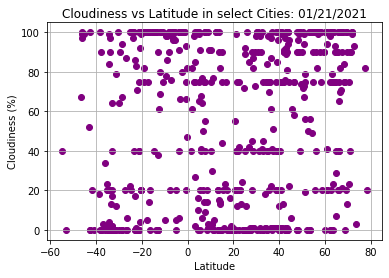

In [29]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Cloudiness (%)"], marker="o", color="purple")

# Incorporate the other graph properties

plt.title("Cloudiness vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Cloudiness vs Latitude in select Cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their cloudiness. 
The plot is suggesting that there is little to no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

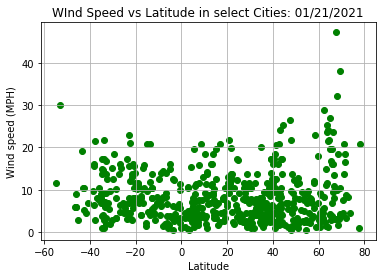

In [32]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Wind Speed (MPH)"], marker="o", color="green")

# Incorporate the other graph properties

plt.title("WInd Speed vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Wind speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("WInd Speed vs Latitude in select Cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their wind speed. The plot is suggesting that the closer cities are to the north pole the more cities with higher wind speed.

## Linear Regression

In [53]:
# OPTIONAL: Create a function to create Linear Regression plots

In [35]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hemisphere = Cleaned_weather_data.loc[Cleaned_weather_data["Latitude"] > 0]
Southern_Hemisphere = Cleaned_weather_data.loc[Cleaned_weather_data["Latitude"] < 0]

Northern_Hemisphere

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
1,Komárno,47.7636,18.1226,51.80,62,0,21.85,SK,1611259785
2,Abashiri,44.0213,144.2697,21.70,95,100,3.98,JP,1611259786
3,Husavik,66.0449,-17.3389,28.40,74,40,16.11,IS,1611259786
4,Novyy Urgal,51.0736,132.5642,-25.69,83,19,0.92,RU,1611259787
5,Kapaa,22.0752,-159.3190,75.20,83,40,13.80,US,1611259787
...,...,...,...,...,...,...,...,...,...
551,Syamzha,60.0158,41.0614,-12.51,89,100,2.80,RU,1611259888
552,Clarksburg,39.2807,-80.3445,43.00,56,40,17.27,US,1611259889
554,Mindelo,16.8901,-24.9804,71.60,64,75,20.71,CV,1611259889
555,Goleniów,53.5639,14.8285,46.99,70,0,8.05,PL,1611259742


In [36]:
Southern_Hemisphere

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Mount Gambier,-37.8333,140.7667,55.40,94,90,2.82,AU,1611259784
9,Karratha,-20.7377,116.8463,81.82,74,92,6.85,AU,1611259787
11,Rikitea,-23.1203,-134.9692,78.75,74,0,15.59,PF,1611259787
13,Chui,-33.6971,-53.4616,76.57,63,0,13.94,UY,1611259788
15,Mahébourg,-20.4081,57.7000,78.80,73,20,8.05,MU,1611259788
...,...,...,...,...,...,...,...,...,...
547,Xapuri,-10.6517,-68.5044,93.20,49,75,6.91,BR,1611259888
550,Viedma,-40.8135,-62.9967,100.00,18,0,7.00,AR,1611259825
553,Santa Isabel Rio Negro,-0.4139,-65.0192,80.35,90,47,2.10,BR,1611259889
557,Rivadavia,-33.1905,-68.4608,96.80,10,20,13.80,AR,1611259889


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7289321550685389


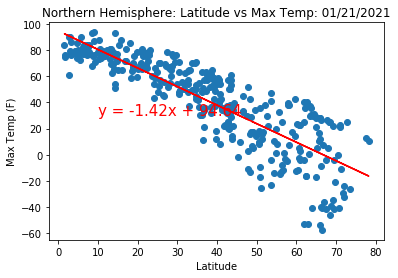

In [37]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set parameters for Linear Regression

x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Maximum Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot

plt.scatter(x_values,y_values)

#create regression line

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

# Create labels for plot

plt.title("Northern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

#Print r^2 value

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6621680242434143


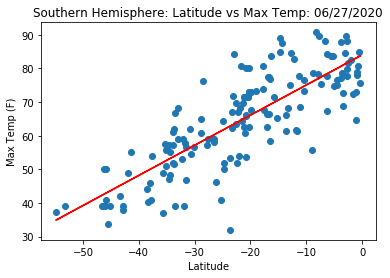

In [79]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set up linear regression parameters

x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot

plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,20),fontsize=1,color="green")
plt.title("Southern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003374038999392201


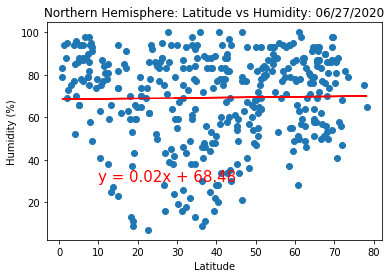

In [58]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Humidity (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the humidity not impacted by latitude. The r-squared value indicates that there 
appears to be no correlation between latitude and humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00202421548680637


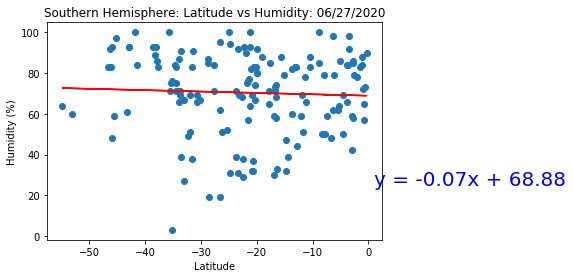

In [59]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Humidity (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=20,color="blue")
plt.title("Southern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator the humidity is higher. The r-squared value indicates that there 
appears to be very little correlation between latitude and humidity in the Southern Hemisphere. This could also be because ther are no cities below -50 latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.005963496689547125


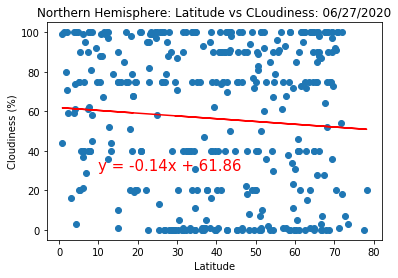

In [60]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Cloudiness (%)"], marker="o")


# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs CLoudiness:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Cloudiness.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Northen Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00207903937817934


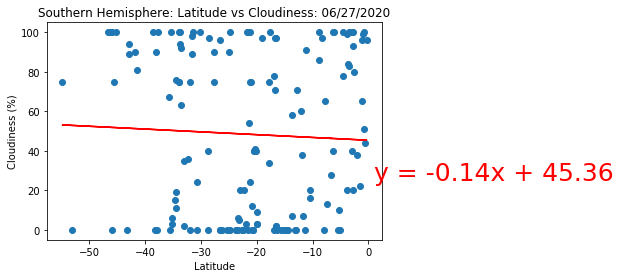

In [61]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Cloudiness (%)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=25,color="red")
plt.title("Southern Hemisphere: Latitude vs Cloudiness:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Cloudiness.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002784445052334432


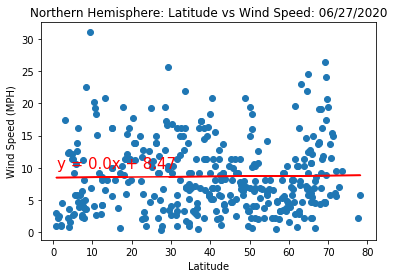

In [62]:
# Build a scatter plot for each data type
#plt.scatter(Northern_Hemisphere["Lat"], Northern_Hemisphere["Wind Speed (MPH)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs Wind Speed:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027200188741323537


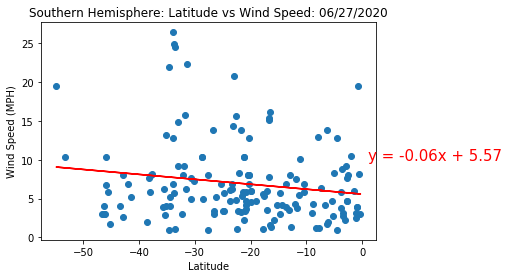

In [63]:
# Build a scatter plot for each data type
#plt.scatter(Southern_Hemisphere["Lat"], Southern_Hemisphere["Wind Speed (MPH)"], marker="o")

# Print out the r-squared value along with the plot.
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs Wind Speed:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Wind Speed.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find higher wind speeds. The r-squared value indicates that it appears to be no correlation between latitude and wind speed in the Southern Hemisphere.